#### Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_forgat='retina'

In [2]:
url='https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/study_hours.csv'
df=pd.read_csv(url)
# df=pd.read_csv(url, nrows=16)
df.T # Transpose

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


<Axes: xlabel='Hours', ylabel='Pass'>

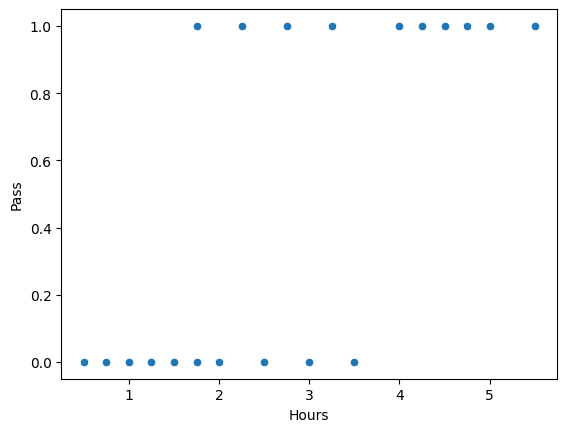

In [3]:
sns.scatterplot(data=df, x='Hours', y='Pass')

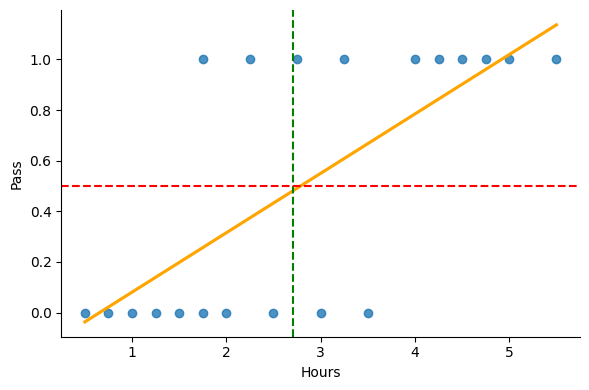

In [13]:
sns.lmplot(x='Hours', y='Pass',data=df,
            logistic=False, ci=None, height=4, aspect=1.5,
            line_kws={'color': 'orange'})
plt.axvline(2.71, color='green', linestyle='--')
plt.axhline(.5, color='red', linestyle='--')

In [15]:
df.at[19, 'Hours']=200
# df.at[19, 'Hours']=5.5 # original data

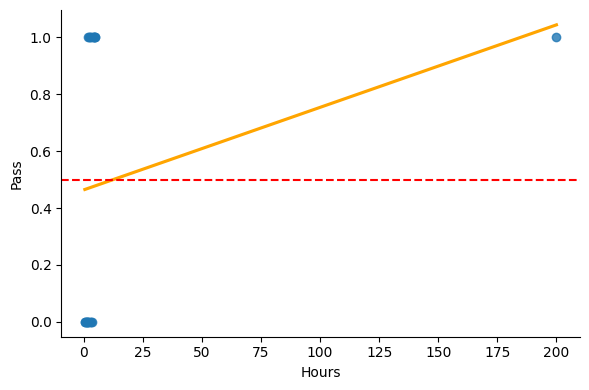

In [16]:
sns.lmplot(x='Hours', y='Pass',data=df,
            logistic=False, ci=None, height=4, aspect=1.5,
            line_kws={'color': 'orange'})
plt.axhline(.5, color='red', linestyle='--')

In [7]:
# df.at[19, 'Hours']=200
df.at[19, 'Hours']=5.5 # original data

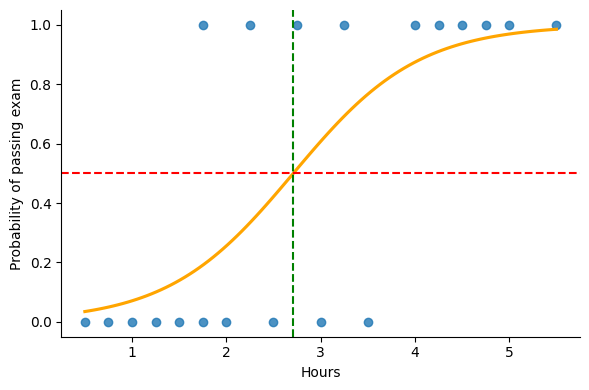

In [8]:
sns.lmplot(x='Hours', y='Pass',data=df,
            logistic=True, ci=None, height=4, aspect=1.5,
            line_kws={'color': 'orange'})
plt.ylabel('Probability of passing exam')
plt.axvline(2.71, color='green', linestyle='--')
plt.axhline(.5, color='red', linestyle='--')

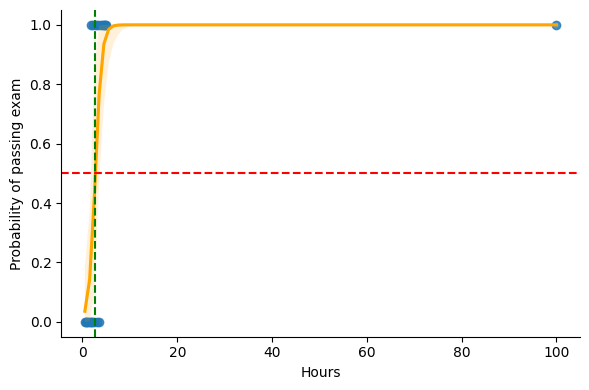

In [18]:
df.at[19, 'Hours']=100
# df.at[19, 'Hours']=5.5 # original data

sns.lmplot(x='Hours', y='Pass',data=df,
            logistic=True, height=4, aspect=1.5,
            line_kws={'color':'orange'})
plt.ylabel('Probability of passing exam')
plt.axvline(2.71, color='green', linestyle='--')
plt.axhline(.5, color='red', linestyle='--')

#### statsmodels

In [19]:
from patsy import dmatrices
import statsmodels.api as sm

In [20]:
y, X = dmatrices('Pass ~ Hours', data=df, return_type='dataframe')

In [21]:
X.head()

,Intercept,Hours
0,1.0,0.50
1,1.0,0.75
2,1.0,1.00
3,1.0,1.25
4,1.0,1.50


In [22]:
y.head()

,Pass
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


#### model_a (with intercept)

In [23]:
model_a = sm.Logit(y,X).fit()
print(model_a.summary())

Optimization terminated successfully.
         Current function value: 0.400727
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Feb 2024   Pseudo R-squ.:                  0.4219
Time:                        14:49:09   Log-Likelihood:                -8.0145
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006261
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0377      1.774     -2.276      0.023      -7.515      -0.560
Hours          1.4870      0.

In [24]:
print(model_a.summary2())

                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Pass             Pseudo R-squared: 0.422     
Date:               2024-02-06 14:49 AIC:              20.0291   
No. Observations:   20               BIC:              22.0205   
Df Model:           1                Log-Likelihood:   -8.0145   
Df Residuals:       18               LL-Null:          -13.863   
Converged:          1.0000           LLR p-value:      0.00062607
No. Iterations:     9.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -4.0377    1.7743  -2.2757  0.0229  -7.5152  -0.5602
Hours          1.4870    0.6374   2.3331  0.0196   0.2378   2.7362



In [25]:
model_a.predict(X)

0     0.035771
1     0.051056
2     0.072382
3     0.101660
4     0.140982
5     0.192259
6     0.192259
7     0.256614
8     0.333613
9     0.420644
10    0.512903
11    0.604292
12    0.688933
13    0.762583
14    0.871065
15    0.907389
16    0.934252
17    0.953721
18    0.967624
19    1.000000
dtype: float64

In [26]:
model_a.predict(X).apply(lambda p: 0 if p < .5 else 1)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
dtype: int64

In [27]:
model_a.params

Intercept   -4.037695
Hours        1.487025
dtype: float64

In [28]:
df

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [29]:
df['predicted']=model_a.predict(X).apply(lambda p: 0 if p < .5 else 1)
df

,Hours,Pass,predicted
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


In [30]:
df['log_odds']=model_a.params['Intercept']+model_a.params['Hours']*df['Hours']
df['odds']=np.exp(model_a.params['Intercept']+model_a.params['Hours']*df['Hours'])
df['prob']=model_a.predict(X)
df

,Hours,Pass,predicted,log_odds,odds,prob
0,0.50,0,0,-3.294182,3.709837e-02,0.035771
1,0.75,0,0,-2.922426,5.380300e-02,0.051056
2,1.00,0,0,-2.550670,7.802939e-02,0.072382
3,1.25,0,0,-2.178913,1.131644e-01,0.101660
4,1.50,0,0,-1.807157,1.641200e-01,0.140982
5,1.75,0,0,-1.435401,2.380199e-01,0.192259
6,1.75,1,0,-1.435401,2.380199e-01,0.192259
7,2.00,0,0,-1.063645,3.451954e-01,0.256614
8,2.25,1,0,-0.691888,5.006298e-01,0.333613
9,2.50,0,0,-0.320132,7.260531e-01,0.420644


#### statsmodels: confusionmatrix

#### [[tn, fp],
#### [fn, tp]]

In [31]:
model_a.pred_table()

array([[8., 2.],
       [2., 8.]])

In [32]:
tn, fp, fn, tp = model_a.pred_table().ravel()

In [33]:
print(f'tn = {tn}')
print(f'fp = {fp}')
print(f'fn = {fn}')
print(f'tp = {tp}')

tn = 8.0
fp = 2.0
fn = 2.0
tp = 8.0


Accuracy = (tp + tn)/(tp + tn + fp + fn)

In [34]:
(tp + tn)/(tp + tn + fp + fn)

0.8

#### Visualize
f(x) = 1/(1 + e^(-x)) # Sigmoid function

In [35]:
import math

In [36]:
def sg(intercept, coef, x):
    ex = math.exp(-(intercept + x * coef))
    return (1/(1+ex))

In [37]:
def sp(intercept, coef, x):
    ex = np.exp(-(intercept + x * coef))
    return (1/(1+ex))

C:\Users\1000259375\AppData\Local\Temp\ipykernel_34320\3532436451.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yp = sp(model_a.params[0], model_a.params[1], xp)


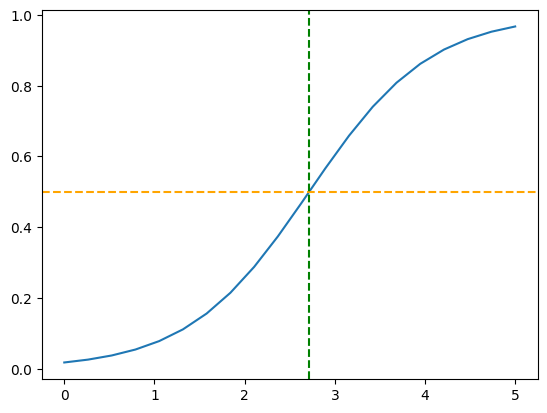

In [38]:
xp = np.linspace(0,5,20)
yp = sp(model_a.params[0], model_a.params[1], xp)
plt.plot(xp, yp)
plt.axhline(.5, color='orange', linestyle='--')
plt.axvline(np.abs(model_a.params['Intercept']/model_a.params['Hours']),
            color='green', linestyle='--')

C:\Users\1000259375\AppData\Local\Temp\ipykernel_34320\2983757885.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yp = sp(model_a.params[0], model_a.params[1], xp)
C:\Users\1000259375\AppData\Local\Temp\ipykernel_34320\2983757885.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yp2 = sp(model_a.params[0], model_a.params[1]+.4, xp)
C:\Users\1000259375\AppData\Local\Temp\ipykernel_34320\2983757885.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, 

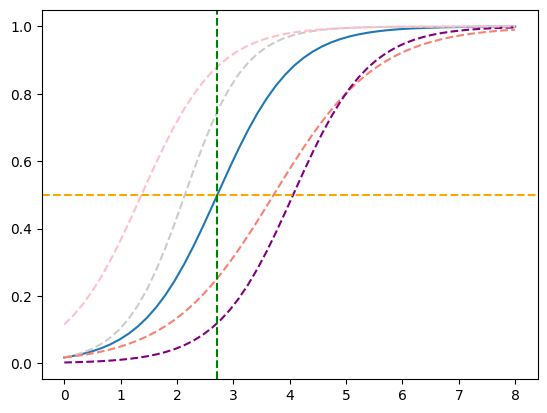

In [45]:
xp = np.linspace(0,8,50)
yp = sp(model_a.params[0], model_a.params[1], xp)
yp2 = sp(model_a.params[0], model_a.params[1]+.4, xp)
yp3 = sp(model_a.params[0], model_a.params[1]-.4, xp)
yp4 = sp(model_a.params[0]-2, model_a.params[1], xp)
yp5 = sp(model_a.params[0]+2, model_a.params[1], xp)

plt.plot(xp, yp)
plt.plot(xp, yp2, color='.8', linestyle='--')
plt.plot(xp, yp3, color='salmon', linestyle='--')
plt.plot(xp, yp4, color='purple', linestyle='--')
plt.plot(xp, yp5, color='pink', linestyle='--')

plt.axhline(.5, color='orange', linestyle='--')
plt.axvline(np.abs(model_a.params['Intercept']/model_a.params['Hours']),
            color='green', linestyle='--')


#### model_b (no intercept)

In [47]:
y_b, X_b = dmatrices('Pass ~ Hours -1', df, return_type='dataframe')

model_b = sm.Logit(y_b, X_b).fit()
print(model_b.summary())

Optimization terminated successfully.
         Current function value: 0.625499
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            0
Date:                Tue, 06 Feb 2024   Pseudo R-squ.:                 0.09760
Time:                        15:24:37   Log-Likelihood:                -12.510
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Hours          0.1828      0.164      1.113      0.266      -0.139       0.505


In [54]:
X_b # ถ้าไม่มี column Intercept model จะ run ไม่ถูกต้อง

,Hours
0,0.50
1,0.75
2,1.00
3,1.25
4,1.50
5,1.75
6,1.75
7,2.00
8,2.25
9,2.50


In [49]:
y_b

,Pass
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,1.0
9,0.0


In [51]:
model_b=sm.Logit(y_b, X_b).fit()
model_b.summary()

Optimization terminated successfully.
         Current function value: 0.625499
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            0
Date:                Tue, 06 Feb 2024   Pseudo R-squ.:                 0.09760
Time:                        15:26:40   Log-Likelihood:                -12.510
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Hours          0.1828      0.164      1.113      0.266      -0.139       0.505
==============================================================================
"""

In [52]:
model_b.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Method:           MLE    
Dependent Variable: Pass             Pseudo R-squared: 0.098  
Date:               2024-02-06 15:26 AIC:              27.0200
No. Observations:   20               BIC:              28.0157
Df Model:           0                Log-Likelihood:   -12.510
Df Residuals:       19               LL-Null:          -13.863
Converged:          1.0000           LLR p-value:      nan    
No. Iterations:     8.0000           Scale:            1.0000 
----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
Hours     0.1828     0.1642   1.1133   0.2656   -0.1390   0.5045
==============================================================

"""

In [53]:
model_b.pred_table()

array([[ 0., 10.],
       [ 0., 10.]])